<a href="https://www.kaggle.com/code/muradpitafi/food-recognition-model?scriptVersionId=201242296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-recognition-2022/visualize_dataset.png
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/109629.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/116547.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/136502.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/106433.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/160913.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/157636.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/157930.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/150623.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/058534.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images/105979.jpg
/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/ima

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


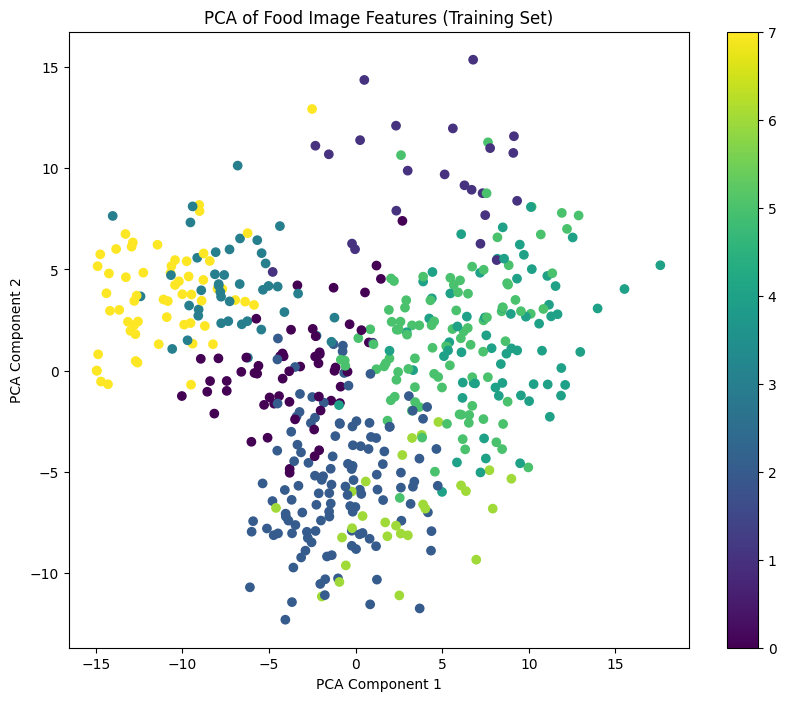

In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

 
train_image_data_dir = '/kaggle/input/food-recognition-2022/raw_data/public_training_set_release_2.0/images'
val_image_data_dir = '/kaggle/input/food-recognition-2022/raw_data/public_validation_set_2.0/images'

 
max_train_images = 500  
max_val_images = 200   
 
def load_images(image_dir, max_images):
    image_files = os.listdir(image_dir)
    selected_images = random.sample(image_files, min(max_images, len(image_files)))  # Randomly sample
    features = []

    for img_name in selected_images:
        img_path = os.path.join(image_dir, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        
        feature = base_model.predict(img_array)
        features.append(feature.flatten())

    return np.array(features)

 
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

 
train_features = load_images(train_image_data_dir, max_train_images)
val_features = load_images(val_image_data_dir, max_val_images)

 
num_clusters = 8   
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(train_features)

 
train_labels = kmeans.labels_

 
pca = PCA(n_components=2)
reduced_train_features = pca.fit_transform(train_features)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_train_features[:, 0], reduced_train_features[:, 1], c=train_labels, cmap='viridis', marker='o')
plt.title('PCA of Food Image Features (Training Set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


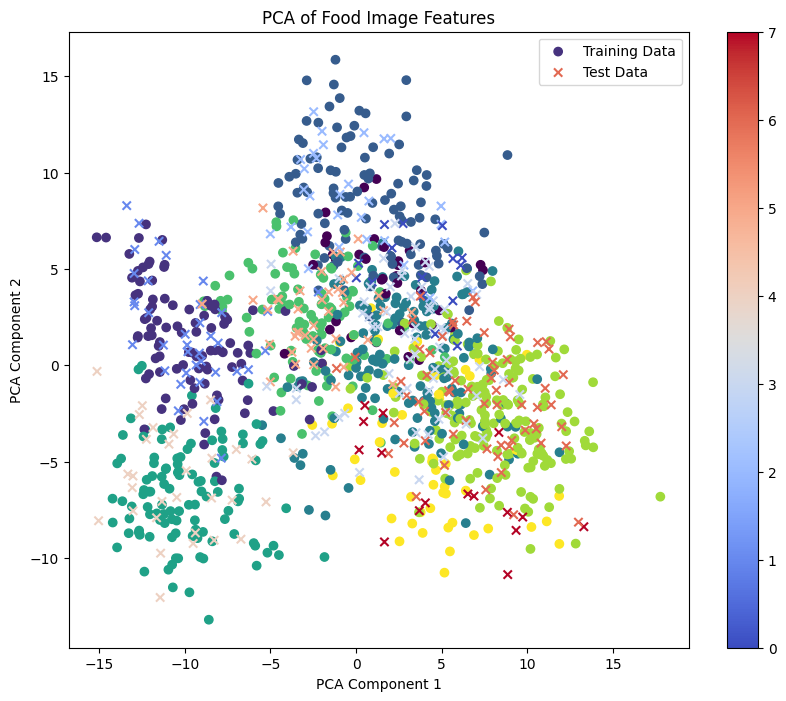

In [3]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

 
train_image_data_dir = '/kaggle/input/food-recognition-2022/raw_data/public_training_set_release_2.0/images'
val_image_data_dir = '/kaggle/input/food-recognition-2022/raw_data/public_validation_set_2.0/images'
test_image_data_dir = '/kaggle/input/food-recognition-2022/raw_data/public_test_release_2.0/images'   

 
max_train_images = 850   
max_val_images = 250   
max_test_images = 300  

 
def load_images(image_dir, max_images):
    image_files = os.listdir(image_dir)
    selected_images = random.sample(image_files, min(max_images, len(image_files)))   
    features = []

    for img_name in selected_images:
        img_path = os.path.join(image_dir, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
         
        feature = base_model.predict(img_array)
        features.append(feature.flatten())

    return np.array(features)


base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

 
train_features = load_images(train_image_data_dir, max_train_images)
val_features = load_images(val_image_data_dir, max_val_images)
test_features = load_images(test_image_data_dir, max_test_images)

 
num_clusters = 8  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(train_features)

 
train_labels = kmeans.labels_
val_labels = kmeans.predict(val_features)
test_labels = kmeans.predict(test_features)

 
pca = PCA(n_components=2)
 
reduced_train_features = pca.fit_transform(train_features)
 
reduced_test_features = pca.transform(test_features)
 
plt.figure(figsize=(10, 8))
plt.scatter(reduced_train_features[:, 0], reduced_train_features[:, 1], c=train_labels, cmap='viridis', marker='o', label='Training Data')
plt.scatter(reduced_test_features[:, 0], reduced_test_features[:, 1], c=test_labels, cmap='coolwarm', marker='x', label='Test Data')
plt.title('PCA of Food Image Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.legend()
plt.show()
